In [1]:
import pandas as pd
import numpy as np

import random
random.seed(10)
np.random.seed(11)

import missingno as mno
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [137]:
df = pd.read_csv('./Melbourne_housing_FULL.csv')

In [138]:
print('Observations : ', df.shape[0])
print('Features -- exclude the Price: ', df.shape[1] - 1)

Observations :  34857
Features -- exclude the Price:  20


In [139]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [140]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [141]:
# zero values
(df==0).sum().sort_values(ascending=False).head(6)

Landsize        2437
Car             1631
Distance          77
BuildingArea      76
Bathroom          46
Bedroom2          17
dtype: int64

In [142]:
# Zeroes to Missing in Landsize and BuildingArea
df['Landsize'].replace(0, np.nan, inplace=True)
df['BuildingArea'].replace(0, np.nan, inplace=True)
df['Distance'].replace(0, np.nan, inplace=True)

In [143]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop('Date', axis=1, inplace=True)

In [144]:
df.drop(['Suburb', 'SellerG'], axis=1, inplace=True)

In [145]:
total_miss = df.isnull().sum().sort_values(ascending=False)
percent = total_miss / df.shape[0]
table = pd.concat([total_miss, percent], axis=1, keys=['Numbers', 'Percent'])
print(table.head(15))

               Numbers   Percent
BuildingArea     21191  0.607941
YearBuilt        19306  0.553863
Landsize         14247  0.408727
Car               8728  0.250394
Bathroom          8226  0.235993
Bedroom2          8217  0.235735
Longtitude        7976  0.228821
Lattitude         7976  0.228821
Price             7610  0.218321
Distance            78  0.002238
Propertycount        3  0.000086
Regionname           3  0.000086
CouncilArea          3  0.000086
Postcode             1  0.000029
Month                0  0.000000


Drop feature missing > 40%

In [146]:
df.drop(['BuildingArea', 'YearBuilt', 'Landsize'], axis=1, inplace=True)

Drop missing thấp

In [147]:
df.dropna(subset=['Propertycount', 'Regionname', 'CouncilArea', 'Postcode', 'Distance'],
          axis=0, inplace=True)

In [148]:
# Drop: Missing in Price
df.dropna(subset=['Price'], axis=0, inplace=True)

Xu ly Address, tach ra la trong ngo va ngoai duong

In [149]:
da_Address = df['Address']
da_Address_arr = []
da_Local_arr = []
for s in da_Address:
    if (s.find('/') == -1):
        da_Local_arr.append(0)
    else:
        da_Local_arr.append(1)
    da_Address_arr.append(s.split()[1])
# da_Address_arr
df['city'] = da_Address_arr
df['local'] = da_Local_arr


In [150]:
df = df.drop(['city', 'Address'], axis=1)
df.describe(include='O').sort_values(axis=1, by=['unique'], ascending=False)

,CouncilArea,Regionname,Method,Type
count,27186,27186,27186,27186
unique,33,8,5,3
top,Boroondara City Council,Southern Metropolitan,S,h
freq,2520,8524,17485,18470


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27186 entries, 1 to 34856
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          27186 non-null  int64  
 1   Type           27186 non-null  object 
 2   Price          27186 non-null  float64
 3   Method         27186 non-null  object 
 4   Distance       27186 non-null  float64
 5   Postcode       27186 non-null  float64
 6   Bedroom2       20798 non-null  float64
 7   Bathroom       20792 non-null  float64
 8   Car            20417 non-null  float64
 9   CouncilArea    27186 non-null  object 
 10  Lattitude      20983 non-null  float64
 11  Longtitude     20983 non-null  float64
 12  Regionname     27186 non-null  object 
 13  Propertycount  27186 non-null  float64
 14  Month          27186 non-null  int64  
 15  Year           27186 non-null  int64  
 16  local          27186 non-null  int64  
dtypes: float64(9), int64(4), object(4)
memory usage: 3

In [152]:
continuous_features = ['Price', 'Distance']
discrete_features  = ['Bathroom','Bedroom2', 'Car', 'Rooms']
category_features  = ['Type', 'Method', 'Regionname', 'CouncilArea']

# Over view data

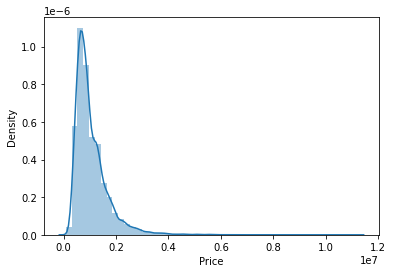

In [153]:
sns.distplot(df['Price']);

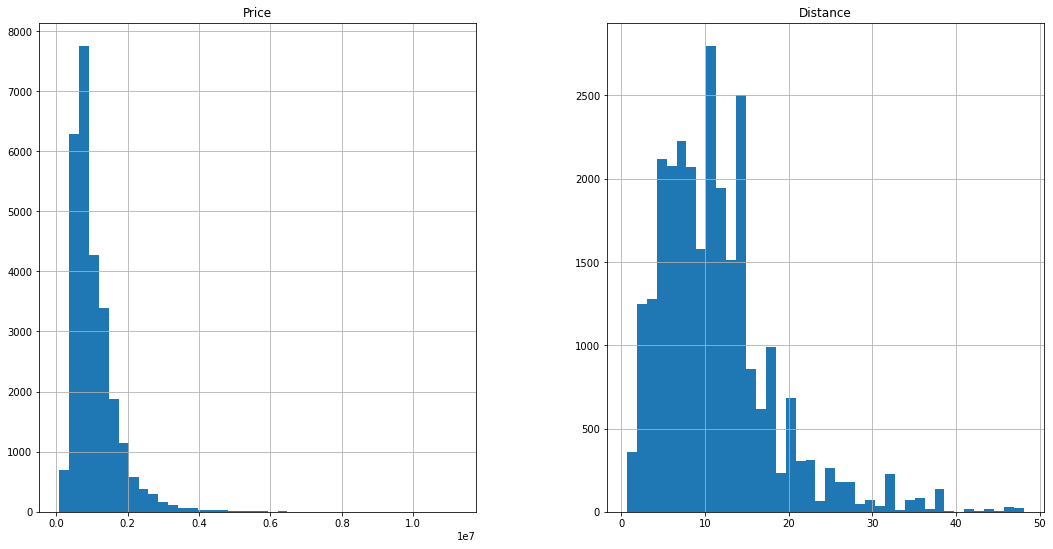

In [154]:
df[continuous_features].hist(bins=40, figsize=(18,9))
plt.show()

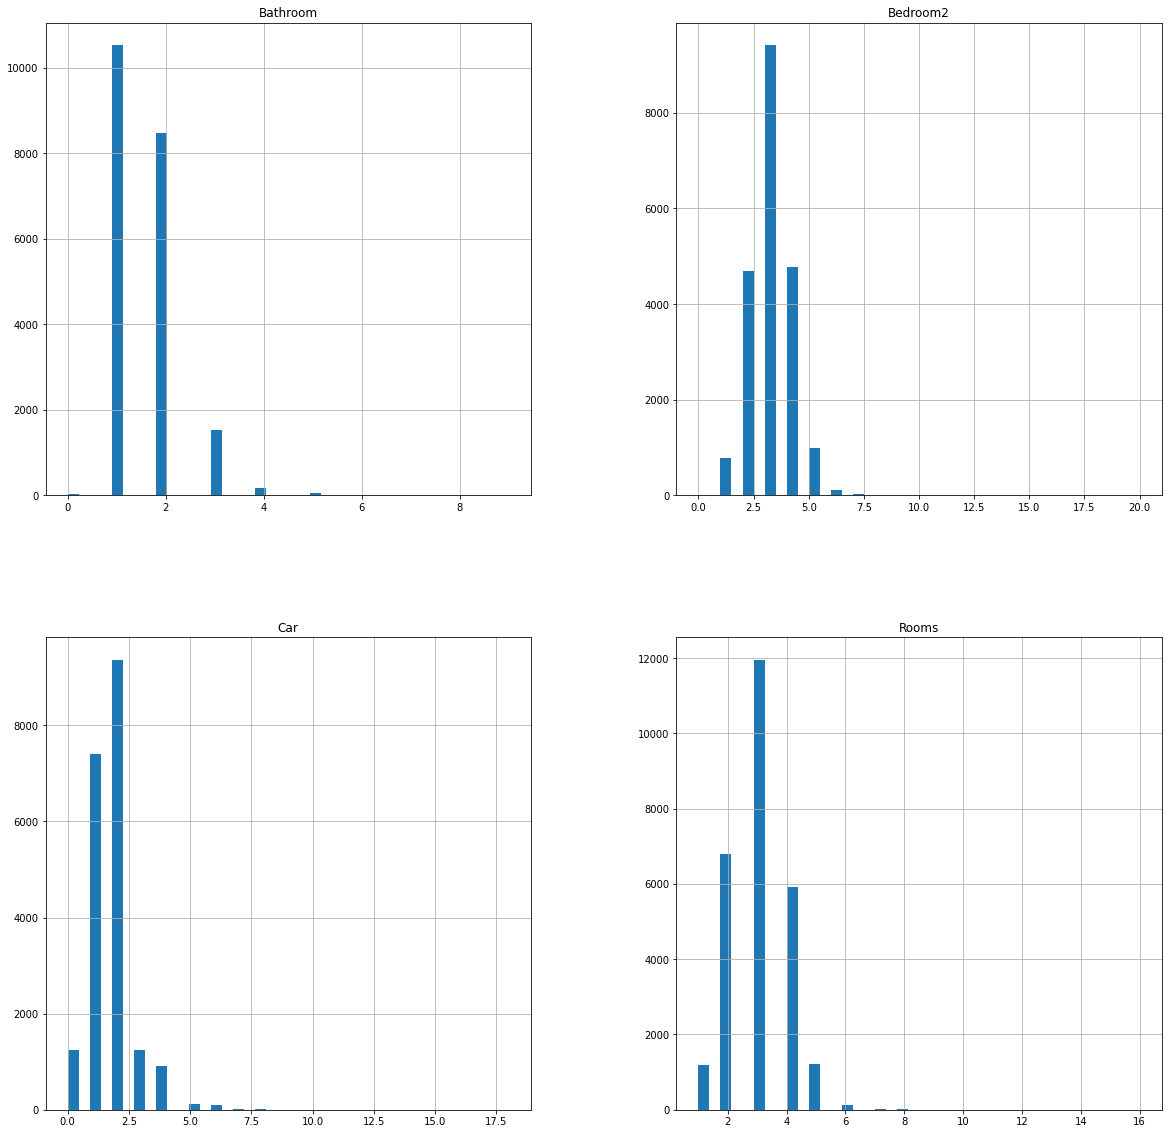

In [24]:
df[discrete_features].hist(bins=40, figsize=(20,20))
plt.show()

# Outlier

In [155]:
# IQR score
def IQR_outlier(data=df, features=[]):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        outside_IQR = (data[feature]<=(Q1-1.5*IQR)) | ((Q3+1.5*IQR)<=data[feature])  
        outside_IQR = outside_IQR.sum()        
        
        print('Outside of IQR: %s Total: %d percent %2.2f'% (feature, outside_IQR, outside_IQR/df.shape[0]))
    return

IQR_outlier(df, features=['Price'])

Outside of IQR: Price Total: 1270 percent 0.05


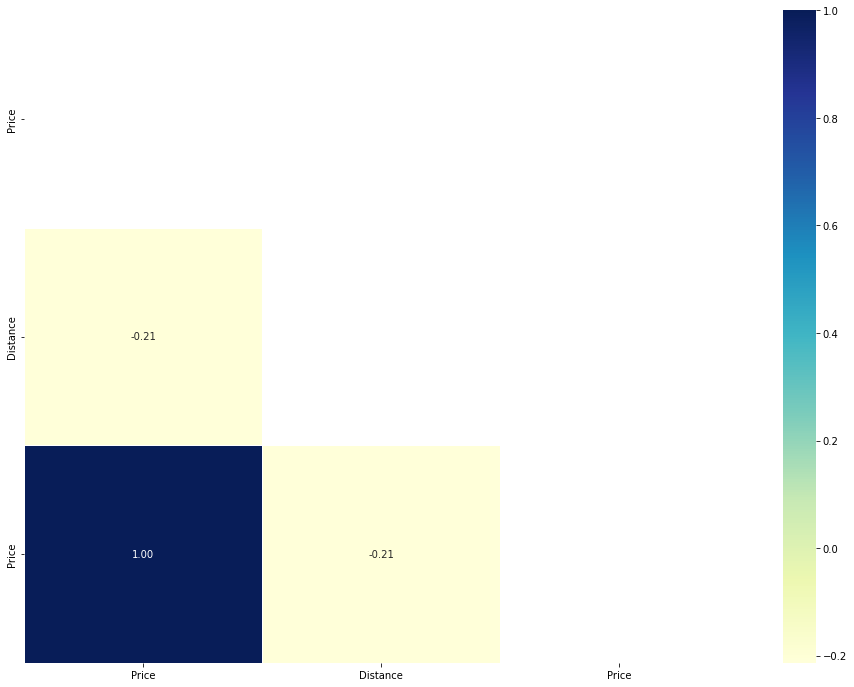

In [156]:
# Price vs Continuous Features
corr_matrix = df[continuous_features + ['Price']].corr()

figure = plt.figure(figsize=(16,12))

mask = np.triu(corr_matrix) # Hide the upper part.
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap="YlGnBu", mask=mask)

plt.show()

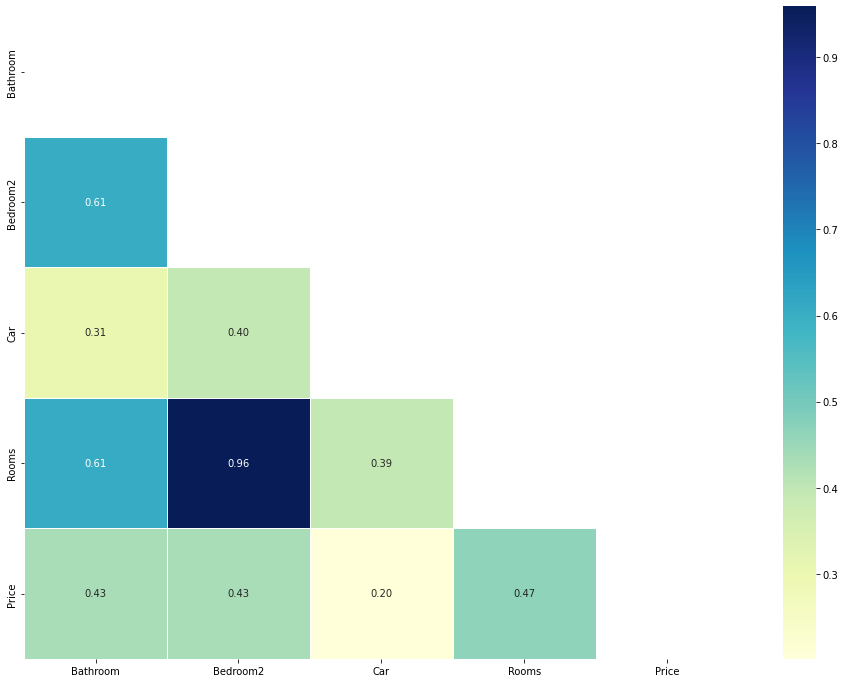

In [157]:
# Price vs Discrete Features

corr_matrix = df[discrete_features + ['Price']].corr()

figure = plt.figure(figsize=(16,12))

mask = np.triu(corr_matrix) # Hide the upper part.
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap="YlGnBu", mask=mask)

plt.show()

In [158]:
df.drop('Bedroom2', axis=1, inplace=True)

discrete_features.remove('Bedroom2')

In [159]:
features_number = continuous_features + discrete_features
IQR_outlier(df, features_number)

Outside of IQR: Price Total: 1270 percent 0.05
Outside of IQR: Distance Total: 1188 percent 0.04
Outside of IQR: Bathroom Total: 238 percent 0.01
Outside of IQR: Car Total: 1171 percent 0.04
Outside of IQR: Rooms Total: 43 percent 0.00


In [160]:
def IQR_outlier_remove(data=df, features=[]):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        outside_IQR = (data[feature]<=(Q1-1.5*IQR)) | ((Q3+1.5*IQR)<=data[feature])
        data = data[~outside_IQR]
        # debug
        #inside_IQR = ((Q1-1.5*IQR)<= data[feature]) & (data[feature]<=(Q3+1.5*IQR))
        
    return data

# Driving code
features = continuous_features + discrete_features
df = IQR_outlier_remove(df, features)

In [161]:
df.shape

(22948, 16)

In [162]:
df.dtypes

Rooms              int64
Type              object
Price            float64
Method            object
Distance         float64
Postcode         float64
Bathroom         float64
Car              float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
Month              int64
Year               int64
local              int64
dtype: object

# Feature scaler

In [163]:
features_to_scaler = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Lattitude', 'Longtitude', 'Month', 'Year']

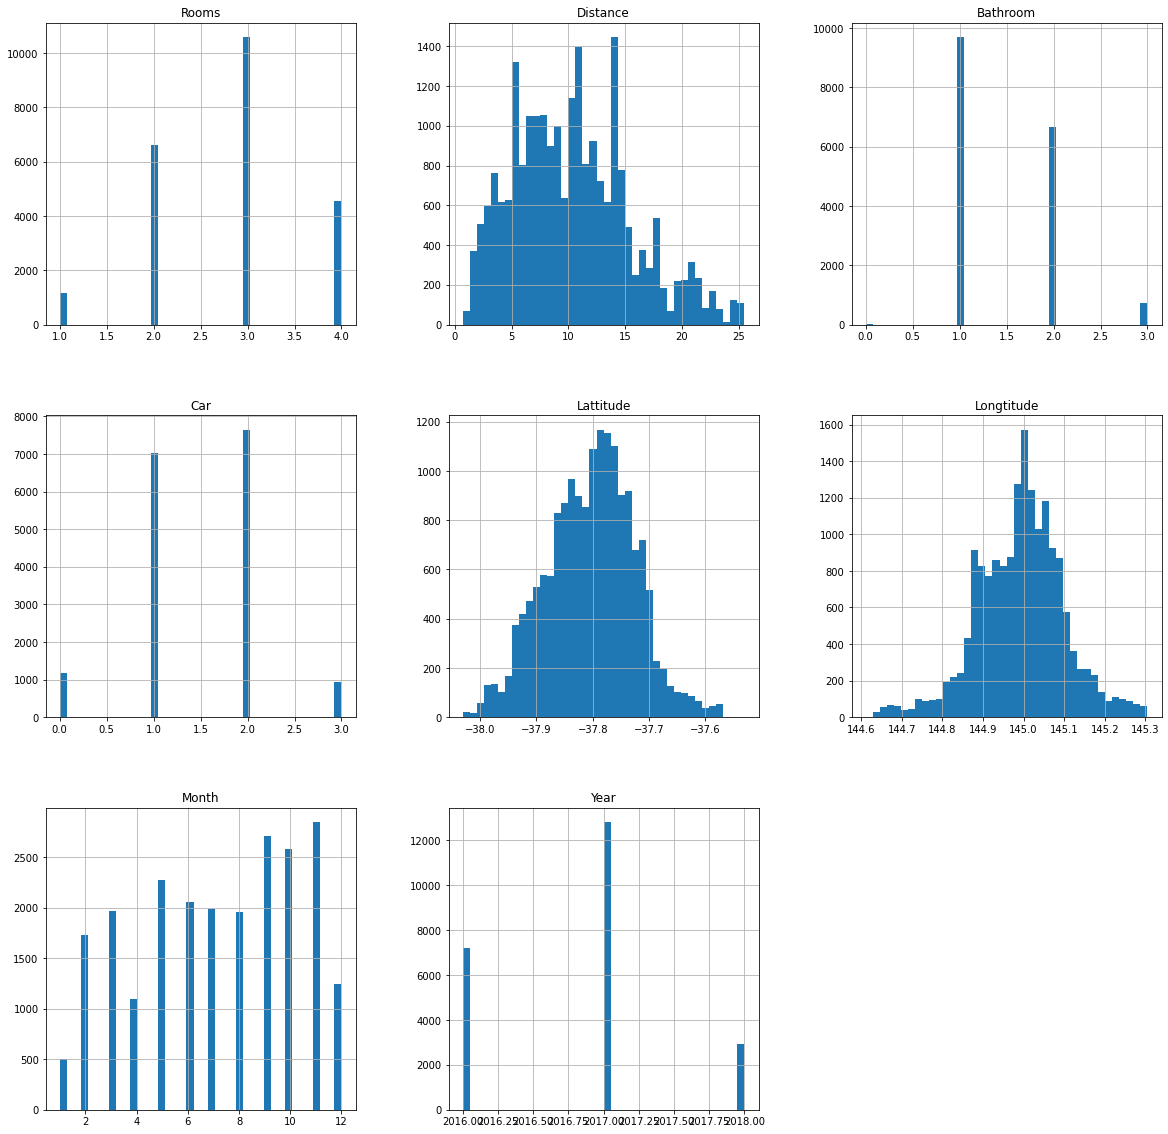

In [164]:
df[features_to_scaler].hist(bins=40, figsize=(20,20))
plt.show()

In [165]:
features_std_scaler = ['Distance', 'Lattitude', 'Longtitude']
features_nor_scaler = ['Rooms', 'Bathroom', 'Car', 'Month', 'Year']

In [166]:
df_scaler = df

In [167]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

for feature_std in features_std_scaler:
    df_scaler[feature_std] = std_scaler.fit_transform(df_scaler[feature_std].values.reshape(-1, 1))

for feature_mm in features_nor_scaler:
    df_scaler[feature_mm] = mm_scaler.fit_transform(df_scaler[feature_mm].values.reshape(-1, 1))

In [168]:
df_scaler

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year,local
1,0.333333,h,1480000.0,S,-1.503481,3067.0,0.333333,0.333333,Yarra City Council,0.048048,0.049660,Northern Metropolitan,4019.0,1.000000,0.0,0
2,0.333333,h,1035000.0,S,-1.503481,3067.0,0.333333,0.000000,Yarra City Council,-0.057450,0.002854,Northern Metropolitan,4019.0,0.090909,0.0,0
4,0.666667,h,1465000.0,SP,-1.503481,3067.0,0.666667,0.000000,Yarra City Council,-0.075245,0.012215,Northern Metropolitan,4019.0,0.181818,0.5,0
5,0.666667,h,850000.0,PI,-1.503481,3067.0,0.666667,0.333333,Yarra City Council,0.082367,0.035618,Northern Metropolitan,4019.0,0.181818,0.5,0
6,1.000000,h,1600000.0,VB,-1.503481,3067.0,0.333333,0.666667,Yarra City Council,-0.048553,0.009407,Northern Metropolitan,4019.0,0.454545,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,1.000000,h,1480000.0,PI,-0.772816,3013.0,0.333333,1.000000,Maribyrnong City Council,-0.090879,-1.014986,Western Metropolitan,6543.0,0.090909,1.0,0
34853,0.333333,h,888000.0,SP,-0.772816,3013.0,0.666667,0.333333,Maribyrnong City Council,-0.154178,-0.981380,Western Metropolitan,6543.0,0.090909,1.0,0
34854,0.333333,t,705000.0,S,-0.772816,3013.0,0.333333,0.666667,Maribyrnong City Council,-0.247601,-1.072183,Western Metropolitan,6543.0,0.090909,1.0,0
34855,0.666667,h,1140000.0,SP,-0.772816,3013.0,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,0.090909,1.0,1


# Encode

## one hot encode

In [169]:
df_encode = pd.get_dummies(df_scaler)

In [170]:
df_encode.dtypes

Rooms                                         float64
Price                                         float64
Distance                                      float64
Postcode                                      float64
Bathroom                                      float64
Car                                           float64
Lattitude                                     float64
Longtitude                                    float64
Propertycount                                 float64
Month                                         float64
Year                                          float64
local                                           int64
Type_h                                          uint8
Type_t                                          uint8
Type_u                                          uint8
Method_PI                                       uint8
Method_S                                        uint8
Method_SA                                       uint8
Method_SP                   

In [171]:
df_encode.shape

(22948, 53)

# Missing value

In [172]:
# K-nn imputation
neighbors = 11
imputer = KNNImputer(n_neighbors=neighbors)

df_filled = imputer.fit_transform(df_encode)
df_filled = pd.DataFrame(df_filled)

In [132]:
df_filled.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.333333,1480000.0,-1.493072,0.333333,0.333333,0.047912,0.050003,1.000000,0.0,0.068966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.333333,1035000.0,-1.493072,0.333333,0.000000,-0.057611,0.003190,0.090909,0.0,0.103448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.666667,1465000.0,-1.493072,0.666667,0.000000,-0.075409,0.012553,0.181818,0.5,0.103448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,850000.0,-1.493072,0.666667,0.333333,0.082239,0.035959,0.181818,0.5,0.103448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,1600000.0,-1.493072,0.333333,0.666667,-0.048711,0.009744,0.454545,0.0,0.103448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
y = df_filled[1]

X = df_filled.drop(labels=1, axis=1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [194]:
le = LinearRegression()
le.fit(X_train, y_train)
y_pred = le.predict(X_test)

In [199]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_Square:', metrics.r2_score(y_test, y_pred))

MAE:  159346.41871688265
MSE: 48104747302.48427
RMSE: 219327.94464564763
R_Square: 0.7453309691228778


In [201]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predict_ra = rf.predict(X_test)

In [202]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, predict_ra))
print('MSE:', metrics.mean_squared_error(y_test, predict_ra))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_ra)))
print('R_Square:', metrics.r2_score(y_test, predict_ra))

MAE:  134654.75000434878
MSE: 36939604219.77985
RMSE: 192196.7851442366
R_Square: 0.8044398165428059


# Keras

In [179]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense